# Final Project - Gibbs Sampling

### 1.

Let $p(x|y)=C_1ye^{-yx}, p(y|x)=C_2xe^{-xy}$, then because they are conditional distributions, so we can get that  
$\int_0^BC_1ye^{-yx}dx=1, \int_0^BC_2xe^{-xy}dy=1$  
$\Rightarrow C_1=\frac{1}{1-e^{-yB}}\ ,\ C_2=\frac{1}{1-e^{-xB}}$

So the CDF of these distributions are  
$F_X(x)=\int_0^x\frac{1}{1-e^{-yB}}ye^{-yu}du=\frac{1-e^{-yx}}{1-e^{-yB}}$  
Similar, we get  
$F_Y(y)=\frac{1-e^{-yx}}{1-e^{-xB}}$  
So the inverse of these CDF are:  
$F_X^{-1}(u)=-\frac{1}{y}log(1-u(1-e^{-yB}))$  
$F_Y^{-1}(u)=-\frac{1}{x}log(1-u(1-e^{-xB}))$

So in this case, we can change the example sampler like this:  
First, we create a T\*2 Numpy matrix as the output matrix, the first column is X, and the second column is Y. After that, we set the start value of x and y (They can't be 0 because they are the denominators). For each loop, we generate u from Unif[0,1] and use Inverse Transform Sampling, which inverse function of CDF is calculated before, to generate the samples from the conditional distribution. We also set thin=1000 so we can get the sample more correctly.  
Finally, we put the value of x and y in the output matrix. And we return the output matrix after the loop.  
The code is showed below:

In [3]:
import numpy as np
import random,math
import matplotlib.pyplot as plt 

In [1]:
def gibbs(B=5.0,T=1000,thin=1000):
    output=np.zeros((T,2)) #create the output matrix T*2
    x=1 
    y=1
    # Set the start value of x and y
    for i in range(T): 
        for j in range(thin):
            u=random.uniform(0,1)
            x=-1/y*math.log(1-u*(1-math.exp(-y*B)))
            y=-1/x*math.log(1-u*(1-math.exp(-x*B)))
            # using Gibbs sampling to get the samples we need
        output[i,0]=x
        output[i,1]=y
        # save the value of x and y for each loop
    return output


### 2.  
According to the problem, let's set B=5 and T=500, 5000, 50000 seperately, and we use plt functions to plot the histogram of the values of X.

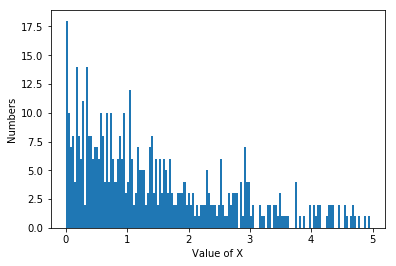

In [4]:
#get the sample of different sample size and plot the historgram of the values of x
output1=gibbs(B=5.0,T=500)
plt.hist(output1[:,0],150)
plt.xlabel("Value of X")
plt.ylabel("Numbers")
plt.show()

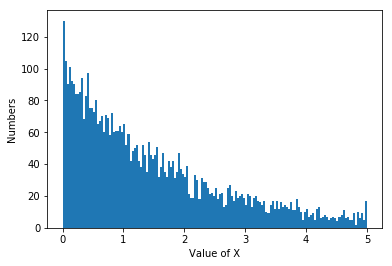

In [5]:
output2=gibbs(B=5.0,T=5000)
plt.hist(output2[:,0],150)
plt.xlabel("Value of X")
plt.ylabel("Numbers")
plt.show()

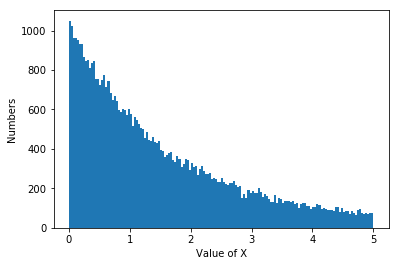

In [6]:
output3=gibbs(B=5.0,T=50000)
plt.hist(output3[:,0],150)
plt.xlabel("Value of X")
plt.ylabel("Numbers")
plt.show()

We can see that with the increase of sample size, the histogram of values of x will be more smooth and similar to the exponent distribution.

### 3.

According to the sampler and the Method of moments, we know that $E_{p(x)}(X)=\bar{x}=\frac{1}{T}\sum_{i=1}^Tx_i$  
So we can calculate the estimate of the expection of X with different sample sizes by calculate their means.

In [7]:
# compute the mean value of output matrix of different sample sizes, and according to the method of moments, 
#they are the estimates of the expectation of X
EX1=np.mean(output1[:,0])
EX2=np.mean(output2[:,0])
EX3=np.mean(output3[:,0])

So we can see that the estimates of the expectation of X by using the 500, 5000, and 50000 samples from the samplers are

In [8]:
print(EX1,",",EX2,"and",EX3)

1.42994770665 , 1.43387564077 and 1.45735154829
